# Project: 데이터분석전문가(ADP) 실기시험
#### Summary: 파이썬 한권으로 끝내기 - 제1회 기출동형 모의고사

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

## 머신러닝(50점)

### (1) 시각화 포함 탐색적 자료분석을 시행하시오. [20분]

In [4]:
import pandas as pd

df = pd.read_csv("./data/student_data.csv")
df.head(3)

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8


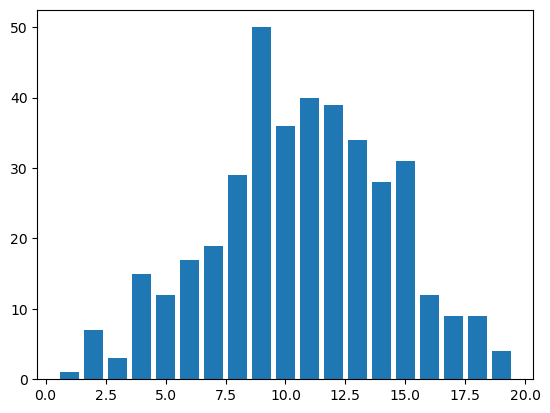

In [6]:
import matplotlib.pyplot as plt

plt.bar(df['grade'].value_counts().index, df['grade'].value_counts().values)
plt.show()

### (2) 결측치를 식별/예측하는 두 가지 방법을 쓰고, 이를 선택한 이유를 설명하시오.

In [18]:
df[df.isna().any(axis=1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


In [17]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

#### (2-1). 단순 대치법
- 수치형 변수라면 각 컬럼의 평균이나 중앙값을 사용하여 결측치를 보관할 수 있으며, 명목형/범주형 변수라면 최빈값을 사용하여 대치할 수 있다.

####  (2-2). KNN을 이용한 결측치 대체
- 보간법 중 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 통해 결측치가 있는 변수 대체를 할 수 있다.
- 단, KNN을 이용할 때에는 거리 계산이 가능한 수치형 변수만 사용 가능하다.

- 해당 데이터에서는 한 행이 전부 결측치인 경우는 존재하지 않으므로 삭제보다는 대체하는 것이 좋다.
- 수치형 변수만 결측치가 있으므로 KNN 기법을 사용하여 대체하겠다.

In [20]:
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만을 추출
KNN_data = df.drop(columns=['school', 'sex', 'paid', 'activities'])

# 모델링
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns=KNN_data.columns)
df[KNN_data.columns] = df_filled

# 결측치 확인
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

### (3) 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 이를 선택한 이유를 설명하시오.

- 이산형 변수: school, sex, paid, activities
- 이산형 변수이므로 boolean 타입으로 변경하여 KNN을 이용한 결측치 처리와 머신러닝에서 변수로 사용 가능하도록 변환하였다.
- 나머지 변수들은 수치나 순위형 변수로 판단되므로 원-핫 인코딩을 하지 않았다.

In [21]:
df = pd.get_dummies(data=df, columns=['school', 'sex', 'paid', 'activities'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_MS       395 non-null    bool   
 11  sex_M           395 non-null    bool   
 12  paid_yes        395 non-null    bool   
 13  activities_yes  395 non-null    bool   
dtypes: bool(4), float64(10)
memory usage: 32.5 KB


In [22]:
df.head(3)

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,False,False,False,False
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,False,False,False,False
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,False,False,True,False


### (4) 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용하시오. 이를 선택한 이유를 설명하시오. [15분]

#### (4-1). 랜덤 분할
- train/test 데이터셋을 나누어서 학습된 데이터를 검증할 수 있으며, 분할 시에 무작위로 사용자가 지정하여 비율로 분할한다.
- 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트용 데이터를 나누어서 적용시키는 이유는 모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다.

#### (4-2). 층화 추출 기법
- 종속변수가 범주형 변수인 경우에는 종속변수의 클래스의 비율을 기준으로 학습용 데이터와 테스트용 데이터의 비율이 동일하게 분할한다.
- 즉, 클래스의 편향을 막을 수 있다.

- 해당 데이터는 종속변수가 연속형이므로, 회귀분석을 사용한다.
- 그러므로 층화추출기법을 사용한 분할이 아닌 랜덤 샘플링을 통한 분할을 사용하여, 7:3 비율로 분할하였다.

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('grade', axis=1)
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train.shape : {X_train.shape}")
print(f"X_test.shape  : {X_test.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"y_test.shape  : {y_test.shape}")

X_train.shape : (276, 13)
X_test.shape  : (119, 13)
y_train.shape : (276,)
y_test.shape  : (119,)


### (5) SVM, XGBoost, RandomForest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오. [15분]

**`[공통점]`**
1. 회귀분석과 분류분석을 모두 할 수 있는 분석 알고리즘이다.
2. 모두 범주형 변수를 독립변수로 사용할 수 없어 변환을 해주어야 한다.
3. 과대적합, 과소적합을 피하기 위한 매개변수의 설정이 필요하다.
4. 회귀분석에서 다중공선성의 문제를 해결할 수 있다.

- 해당 데이터에서는 종속변수의 값이 연속형이므로 회귀분석이 적합하다.
- 회귀분석에서 다중공선성의 문제를 해결하는 것이 중요한데 SVM은 커널 트릭을 통해, XGBoost와 RandomForest는 트리 모델을 통해 다중공선성을 해결할 수 있다.
- 그러므로 회귀분석을 지원하는 위 3가지의 알고리즘은 연속형 변수를 예측하기에 적합하다.

### (6) 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘을 선택하시오. 이를 선택한 이유와 한계점, 보완 가능한 부분을 설명하고, 현업에서 주의할 점 등에 대해 기술하시오.

#### SVM(Support Vector Machines)

In [28]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

params = {
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.001, 0.01, 0.1, 1, 10]
}

svm = GridSearchCV(SVR(), params, cv=5)
svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(svm.cv_results_['params'])
result['mean_test_score'] = svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
15,100.0,0.001,0.964169
11,10.0,0.010,0.959437
16,100.0,0.010,0.951701
10,10.0,0.001,0.942709
6,1.0,0.010,0.920341
12,10.0,0.100,0.873728
17,100.0,0.100,0.863269
7,1.0,0.100,0.798050
5,1.0,0.001,0.301072
2,0.1,0.100,0.275776


In [32]:
svm = SVR(C=100, gamma=0.001)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print(f"R2: {svm.score(X_test_scaled, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

R2: 0.9449241765330552
RMSE: 0.9261958310857736


#### RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor

params = {
    'max_depth' : [2, 4, 6, 8, 10],
    'min_samples_split' : [2, 4, 6, 8, 10]
}

rf = GridSearchCV(RandomForestRegressor(n_estimators=100), params, cv=5)
rf.fit(X_train, y_train)

print(rf.best_params_)

rf = rf.best_estimator_
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"R2: {rf.score(X_test, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

{'max_depth': 6, 'min_samples_split': 4}
R2: 0.9656139089327681
RMSE: 0.7318359284470001


#### XGBoost

{'max_depth': 6}
R2: 0.9634095813278851
RMSE: 0.7549288311245698


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

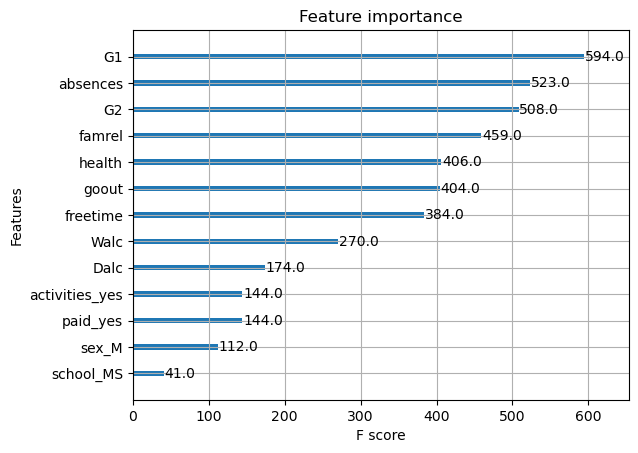

In [44]:
from xgboost import XGBRegressor, plot_importance

params = {
    'max_depth' : [2, 4, 6, 8, 10]
}

xgb = GridSearchCV(XGBRegressor(n_estimators=1000), params, cv=5)
xgb.fit(X_train, y_train)

params = xgb.best_params_
print(params)

xgb = xgb.best_estimator_
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(f"R2: {xgb.score(X_test, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

plot_importance(xgb)

**`[해설]`**
- SVM의 경우 디테일하게 매개변수를 찾아 모델을 적용시켰다.
- 결과 모델의 정확도가 높았으므로 RandomForest와 XGBoost는 비교적 간단하게 그리드 서치를 통하여 매개변수를 적용시켰다.
- 그 결과 XGBoost의 모델 정확도가 가장 높았다.

- XGBoost 모델이 가장 정확도가 높고 RMSE값이 낮으므로 예측 분석력이 가장 좋아 가장 적합한 알고리즘으로 선택하였다.
- XGBoost 분석결과 가족친밀도인 farmrel 변수가 최종 성적에 영향을 많이 주는 것으로 보였다.

**`[한계점]`**
- G1, G2가 grade와의 상관성이 매우 높은 변수이므로 좋은 결과가 나오지만, 해당 변수를 제외하고 분석하였을 때에는 정확도가 매우 낮게 나온다.
- 현업에서는 정확도만을 보고 변수를 선택하는 것을 주의해야 한다.
- 해당 모델의 주 변수로 G1, G2를 사용할 수는 있지만 이 또한 성적이기 때문에 분석을 통해 성적에 영향을 미치는 변수를 찾기에는 어려워 보인다. 
- 머신러닝은 어떠한 독립변수를 선택하느냐에 따라 결과 해석이 완전히 달라질 수 있다.
- 만약 학생의 성적에 영향을 미치는 변수를 찾고 싶다면 성적과 밀접 관련이 있는 추가적인 변수를 추가해야 한다.
- 그러면 모델의 정확성뿐만이 아니라 의미있는 분석이 될 것이라 생각한다.

# 통계분석(50점)

## 1. 회귀분석

### (1) 선형회귀 적용 [30분]
- 데이터를 8:2로 분할하고 선형 회귀를 적용하시오.
- 결정계수와 RMSE를 구하시오.

In [6]:
import mglearn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
X, y = mglearn.datasets.load_extended_boston()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형회귀 적용
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# 결정계수 및 RMSE
print(f"결정계수: {lr.score(X_test, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

결정계수: 0.8055829447972158
RMSE: 3.7758890567533254


**`[해설]`**
- sklearn의 LinearRegression을 통해 선형 회귀 모델을 만들고 20%의 test 셋으로 모델을 검증하였다.
- 모델의 정확도는 약 80%이며, RMSE 값은 약 3.8이다. 이는 모델이 예측할 때 실제 값과의 차이가 약 3.8 정도 난다는 의미이다.

### (2) Ridge 회귀 적용 [10분]
- 데이터를 8:2로 분할하고 Ridge 회귀를 적용하시오.
- alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을 때의 alpha를 찾고
- 해당 alpha로 다시 모델을 학습해서 결정계수와 RMSE를 계산하시오.

In [9]:
import mglearn
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
X, y = mglearn.datasets.load_extended_boston()

# 데이터 8:2 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# parameter search
params = {
    'alpha' : np.arange(0, 1.1, 0.1)
}

ridge = GridSearchCV(Ridge(random_state=42), params)
ridge.fit(X_train, y_train)

alpha = ridge.best_params_
ridge = ridge.best_estimator_
y_pred = ridge.predict(X_test)

print(f"최적 alpha: {alpha}")
print(f"결정계수: {ridge.score(X_test, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

최적 alpha: {'alpha': 0.1}
결정계수: 0.8510741726311941
RMSE: 3.304738163793873


**`[해설]`**
- Ridge 회귀에서는 GridSearchCV 함수를 활용하여 alpha를 0부터 1까지 적용시켜 최적의 모델을 찾아냈다.
- 최적의 모델을 갖는 alpha 값은 0.1 이었다.
- alpha 값을 조정하여 모델의 학습 정도를 조절할 수 있으며 평가지표로는 R^2와 RMSE가 사용된다.
- alpha=0.1의 모델로 test 데이터를 예측하여 검증해 본 결과 R^2는 약 0.85, RMSE는 약 3.3으로 나타났다.

### (3) Lasso 회귀 적용 [10분]
- 데이터를 8:2로 분할하고 Lasso 회귀를 적용하시오.
- alpha값을 0부터 1까지 0.1 단위로 모두 탐색해서 결정계수가 가장 높을 때의 alpha를 찾고
- 해당 alpha로 다시 모델을 학습해서 결정계수와 RMSE를 계산하시오.

In [11]:
import mglearn
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
X, y = mglearn.datasets.load_extended_boston()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# parameter search
params = {
    'alpha' : np.arange(0, 1.1, 0.1)
}

lasso = GridSearchCV(Lasso(random_state=42), params)
lasso.fit(X_train, y_train)

alpha = lasso.best_params_
lasso = lasso.best_estimator_
y_pred = lasso.predict(X_test)

print(f"최적 alpha: {alpha}")
print(f"결정계수: {lasso.score(X_test, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

최적 alpha: {'alpha': 0.0}
결정계수: 0.7930459113223858
RMSE: 3.8957318007309496


**`[해설]`**
- Lasso 회귀에서도 GridSearchCV 함수를 활용하여 alpha를 0부터 1까지 적용시켜 최적의 모델을 찾아냈다.
- 최적의 모델을 갖는 alpha 값은 0이었다.
- alpha=0의 모델로 test 데이터를 예측하여 검증해본 결과 R^2는 약 0.79, RMSE는 약 3.9로 나타났다.
- 해당 데이터에서는 Ridge 회귀의 예측력이 더 좋은 것을 알 수 있었다.

## 2. 다항 회귀분석 시각화 [30분]
- 아래와 같은 단순 선형 회귀를 다항 회귀로 3차까지 적용시켜 계수를 구하고 3차항을 적용한 모델의 스캐터 플롯과 기울기 선을 그리시오.

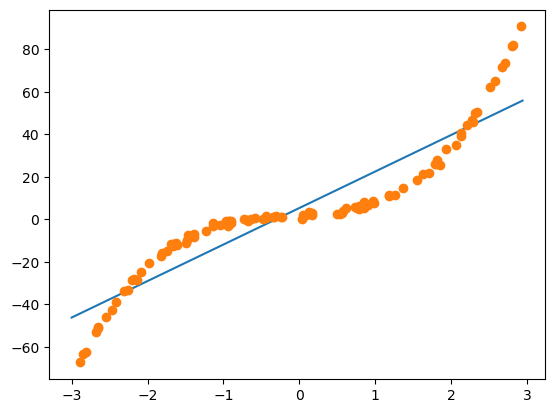

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 3 * X**3 + X**2 + 2*X + 2 + np.random.randn(m, 1) # 노이즈 포함
line = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1)

lr = LinearRegression().fit(X, y)
plt.plot(line, lr.predict(line))
plt.plot(X[:, 0], y, 'o')
plt.show()

In [12]:
X[:5]

array([[-1.95466427],
       [-1.02562601],
       [-1.21496863],
       [ 0.37879869],
       [ 1.03957358]])

In [13]:
y[:5]

array([[-19.36705652],
       [ -1.62738419],
       [ -5.92863807],
       [  1.728897  ],
       [ 10.62656548]])

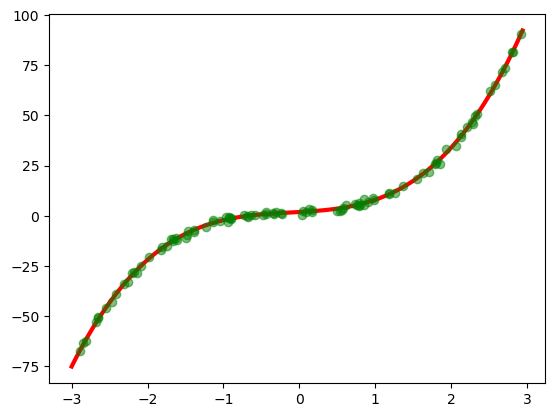

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# x**3까지 3차항을 적용시켜야 함
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)
line_poly = poly.transform(line)

lr = LinearRegression().fit(X_poly, y)

# 기울기선
plt.plot(line, lr.predict(line_poly), c='r', linewidth=3)

# 스캐터플롯
plt.plot(X, y, 'o', c='g', alpha=0.5)
plt.show()

In [21]:
X_poly[:5]

array([[-1.95466427,  3.8207124 , -7.46821   ],
       [-1.02562601,  1.05190871, -1.07886493],
       [-1.21496863,  1.47614878, -1.79347446],
       [ 0.37879869,  0.14348845,  0.05435324],
       [ 1.03957358,  1.08071322,  1.12348091]])

In [20]:
lr.coef_

array([[2.4026438 , 0.95357666, 2.93656879]])

## 3. ANOVA(ANalysis Of VAriance) 분석 [20분]
- 분산분석은 통계학에서 두 개 이상 다수의 집단을 서로 비교하고자 할 때 집단 내의 분산, 총평균 그리고 각 집단의 평균의 차이에 의해 생긴 집단 간 분산의 비교를 통해 만들어진 F분포를 이용하여 가설검정을 하는 방법이다.
- 분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A, B의 영향을 알아보기 위해 사용되는 검증 방법이다. 

### 3-1. 상호작용효과 검정에 대한 가설
- 귀무가설(H0): region과 avocado type 간에는 상호작용 효과가 없다.
- 대립가설(H1): region과 avocado type 간에는 상호작용 효과가 있다.

### 3-2. 주효과 검정에 대한 가설
- 귀무가설(H0): region 종류에 따른 AveragePrice 차이는 존재하지 않는다.
- 대립가설(H1): region 종류에 따른 AveragePrice 차이는 존재한다.

- 귀무가설(H0): type 종류에 따른 AveragePrice 차이는 존재하지 않는다.
- 대립가설(H1): type 종류에 따른 AveragePrice 차이는 존재한다.

In [1]:
import pandas as pd
import numpy as np

avocado = pd.read_csv("./data/avocado.csv")
avocado = avocado[['AveragePrice', 'type', 'region']]
avocado = avocado[(avocado['region']=='Orlando') | (avocado['region']=='Boston') | (avocado['region']=='Chicago')]
avocado.reset_index(drop=True, inplace=True)
avocado.head()

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston


In [2]:
# 독립변수(type, region), 종속변수(AveragePrice)를 Series로 변경
AveragePrice = avocado['AveragePrice']
avocado_type = avocado['type']
region = avocado['region']

# ANOVA 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~C(avocado_type)*C(region)'
model = ols(formula, avocado).fit()

aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


**`[해설]`**
- 상호작용에 대한 검정 결과는 C(avocado_type):C(region) 행의 p-value 값을 보고 판단할 수 있다.
- 유의수준 0.05 하에서 귀무가설을 기각할 수 있으며 유의수준 0.05 하에서 상호작용 효과가 있다고 할 수 있다.
- 또한, 주효과 검정도 모두 유의수준 0.05 하에서 유의하므로 각 변수의 종류에 따른 AveragePrice의 차이가 있다고 할 수 있다.

- 더 직관적으로 판단하기 위해 그래프로 해당 모델을 표현하였다.
- 통계표에서 보았던 상호작용 효과와 각 변수별 차이가 확실히 나타남을 알 수 있다.
- 특히 orlando에서는 다른 지역보다 conventional 대비 organic의 선호도가 높음을 알 수 있다.

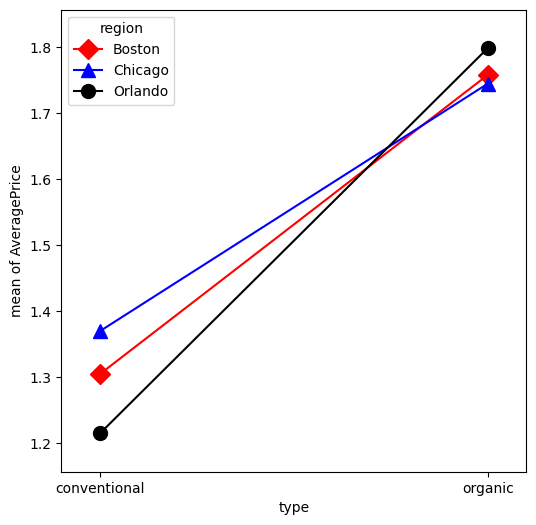

In [3]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(avocado_type, region, AveragePrice, colors=['red', 'blue', 'black'], markers=['D', '^', 'o'], ms=10, ax=ax)